# Reference
https://pyimagesearch.com/2014/11/24/detecting-barcodes-images-python-opencv/

In [1]:
import cv2
import numpy as np
import imutils

from matplotlib import pyplot as plt

[[  0   0   0 ...  24  30   0]
 [  0   0   0 ...  38  12  10]
 [  0   0   0 ...  10   6  16]
 ...
 [ 26 164 158 ...  16  16  16]
 [ 16 186 134 ...  16  16  16]
 [  0 166 134 ...   0   0   0]]
----------
[[  0   0   0 ...  24  30   0]
 [  0   0   0 ...  52   0  10]
 [  0   0   0 ...  36  26  16]
 ...
 [ 26 202 184 ...  16  16  16]
 [ 16 166 166 ...  16  16  16]
 [  0 166 134 ...   0   0   0]]


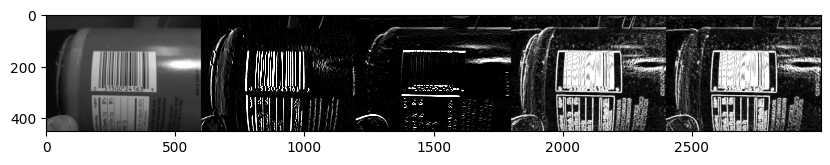

In [43]:
image = cv2.imread('../resources/barcode_sample1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# find the edge
gray_x = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
gray_y = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=-1)
gray_xy =  cv2.addWeighted(gray_x, 1, gray_y, 1, 0)

gradient = cv2.subtract(gray_x, gray_y)
gradient = cv2.convertScaleAbs(gradient)

gradient_xy = cv2.convertScaleAbs(gray_xy)

print(gradient_xy)
print('-'*20)
print(gradient)

plt.figure(figsize=(10,10))
plt.imshow(np.hstack([
    gray,
    gray_x,
    gray_y,
   gradient_xy,
    gradient
]), cmap=plt.cm.gray, vmin=0, vmax=255)